# **Master’s in Applied Artificial Intelligence**
## **Course: Artificial Intelligence and Machine Learning**
### Prof. Luis Eduardo Falcón Morales
#### Tecnológico de Monterrey

### **Employee Attrition Analysis with Machine Learning**
##### **Name and student ID:**
* Mario Guillen de la Torre - A01796701

The following activity is based on data from the file "WA_Fn-UseC_-HR-Employee-Attrition.csv" which can be found at the following Kaggle link, titled "IBM HR Analytics Employee Attrition & Performance":

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
# Include here all the libraries you consider necessary:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import kurtosis, skew

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

# **Exercise 1:**

#### **Include a brief introduction about what is understood by the employee attrition problem in organizations.**

++++++++ Section to add text starts ++++++++++++

It is when an organization experiences a high level of resignations, so it is forced to hire and train new staff cyclically; this incurs economic costs, a decrease in productivity, and affects employee morale.

++++++++ Section to add text ends ++++++++++++


# **Exercise 2:**

**Load the data from the Kaggle page as a Pandas DataFrame named "df" and use the "describe" method with the argument include="all" to get a first general description of each variable.**

In [2]:
# ++++++++++++++ THE SECTION TO ADD CODE STARTS. ++++++++++++++++++++
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.xls")
# +++++++++++++ THE SECTION TO ADD CODE ENDS. +++++++++++++++++++++

print("Size of the DataFrame:", df.shape)
df.describe(include = 'all').T


Size of the DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Exercise 3:**

#### **Indicate the difference between using or not using the argument include="all" in the "describe" method in the previous exercise.**

++++++++ Section to add text starts ++++++++++++

The argument "include="all"" ensures that the output also includes non-numeric values; otherwise, they are ignored. Additionally, the metrics "unique", "top", and "freq" are included to analyze those non-numeric values.

++++++++ Section to add text ends ++++++++++++

# **Exercise 4:**

#### **Based on the information displayed by the previous instruction, we have decided to exclude the following factors from our problem: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explain the justification that allows us to exclude each of these factors**

++++++++ Section to add text starts ++++++++++++

**a)   Over18**: When analyzing the data for this attribute in the "unique" column, we realize that a single value (Y) fills the entire column, making it irrelevant for analysis

**b)	EmployeeCount**: We can see that this attribute has the same value in its mean, minimum value, maximum value, and all three quartiles. Additionally, its standard deviation is 0, indicating that this column consists of a single value (1). Therefore, it does not provide relevant information.

**c)	StandardHours**: We encounter the same case as seen in "EmployeeCount", where the entire column consists of a single value (80).

**d)	EmployeeNumber**: This variable does have different values, as its metrics vary significantly. However, we can observe that this column serves as an identifier, meaning it will always be unique in each case, regardless of other values. As a result, it does not contribute meaningful information for analysis.

++++++++ Section to add text ends ++++++++++++




In [3]:
# We eliminate the indicated factors:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Size of the new DataFrame:", df.shape)

Size of the new DataFrame: (1470, 31)


# **Exercise 5:**

**Partition the data into Training, Validation, and Test sets, using 70%, 15%, and 15%, respectively.**

Name these sets as follows:
- Xtrain, Xval, Xtest for input data
- ytrain, yval, ytest for output data

Ensure that the partition maintains stratification of the classes in the "Attrition" variable.

Additionally, display the obtained dimensions of the three sets: Training, Validation, and Test.

**NOTE: Use random seeds in each partitioning function to ensure repeatability of your model and allow for better evaluation.**

In [4]:
# ++++++++++++++ THE SECTION TO ADD CODE STARTS. +++++++++++++++++++++
y = df[['Attrition']]
X = df.drop(['Attrition'],axis=1)

Xtemp,Xtrain, ytemp,ytrain = train_test_split(X,y,test_size=0.7,stratify=y,random_state=1)
Xval,Xtest,yval,ytest = train_test_split(Xtemp,ytemp, test_size=0.5,stratify=ytemp,random_state=1)

print(f'Training Set    X:{Xtrain.shape} y:{ytrain.shape}')
print(f'Validation Set    X:{Xval.shape}  y:{yval.shape}')
print(f'Test Set    X:{Xtest.shape}  y:{ytest.shape}')

# ++++++++++++++ THE SECTION TO ADD CODE ENDS. +++++++++++++++++++++

Training Set    X:(1029, 30) y:(1029, 1)
Validation Set    X:(220, 30)  y:(220, 1)
Test Set    X:(221, 30)  y:(221, 1)


# **Exercise 6:**


Apply the LabelEncoder() transformation from sklearn to the output variable "Attrition". The new variables should now be named: ytrainT, yvalT, ytestT. Find the proportion of data at each level of this variable, and based on this information, determine whether we can consider this a class imbalance problem.

**NOTE: Apply this transformation while avoiding data leakage.**

In [5]:
# ++++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++
le = LabelEncoder()
le.fit(ytrain['Attrition'])

ytrainT = pd.DataFrame(le.transform(ytrain['Attrition']), columns=["Attrition"])
yvalT = pd.DataFrame(le.transform(yval['Attrition']), columns=["Attrition"])
ytestT = pd.DataFrame(le.transform(ytest['Attrition']), columns=["Attrition"])

# +++++++++++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

print('Percentage of data in each training class - Attrition:', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Percentage of data in each training class - Attrition: Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


As we can see in the percentages, there is a strong imbalance in the data. More than 80% of the instances are concentrated in a single category.


# **Exercise 7:**


**Include the appropriate graphical and descriptive analysis below. Based on these graphs, what type of transformations do you suggest for these variables?**

In [6]:
# ++++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++

We can analyze the histograms and boxplots of the numerical variables to get an idea of their distributions and the number of outliers. Based on this, we can decide which transformations will be necessary.

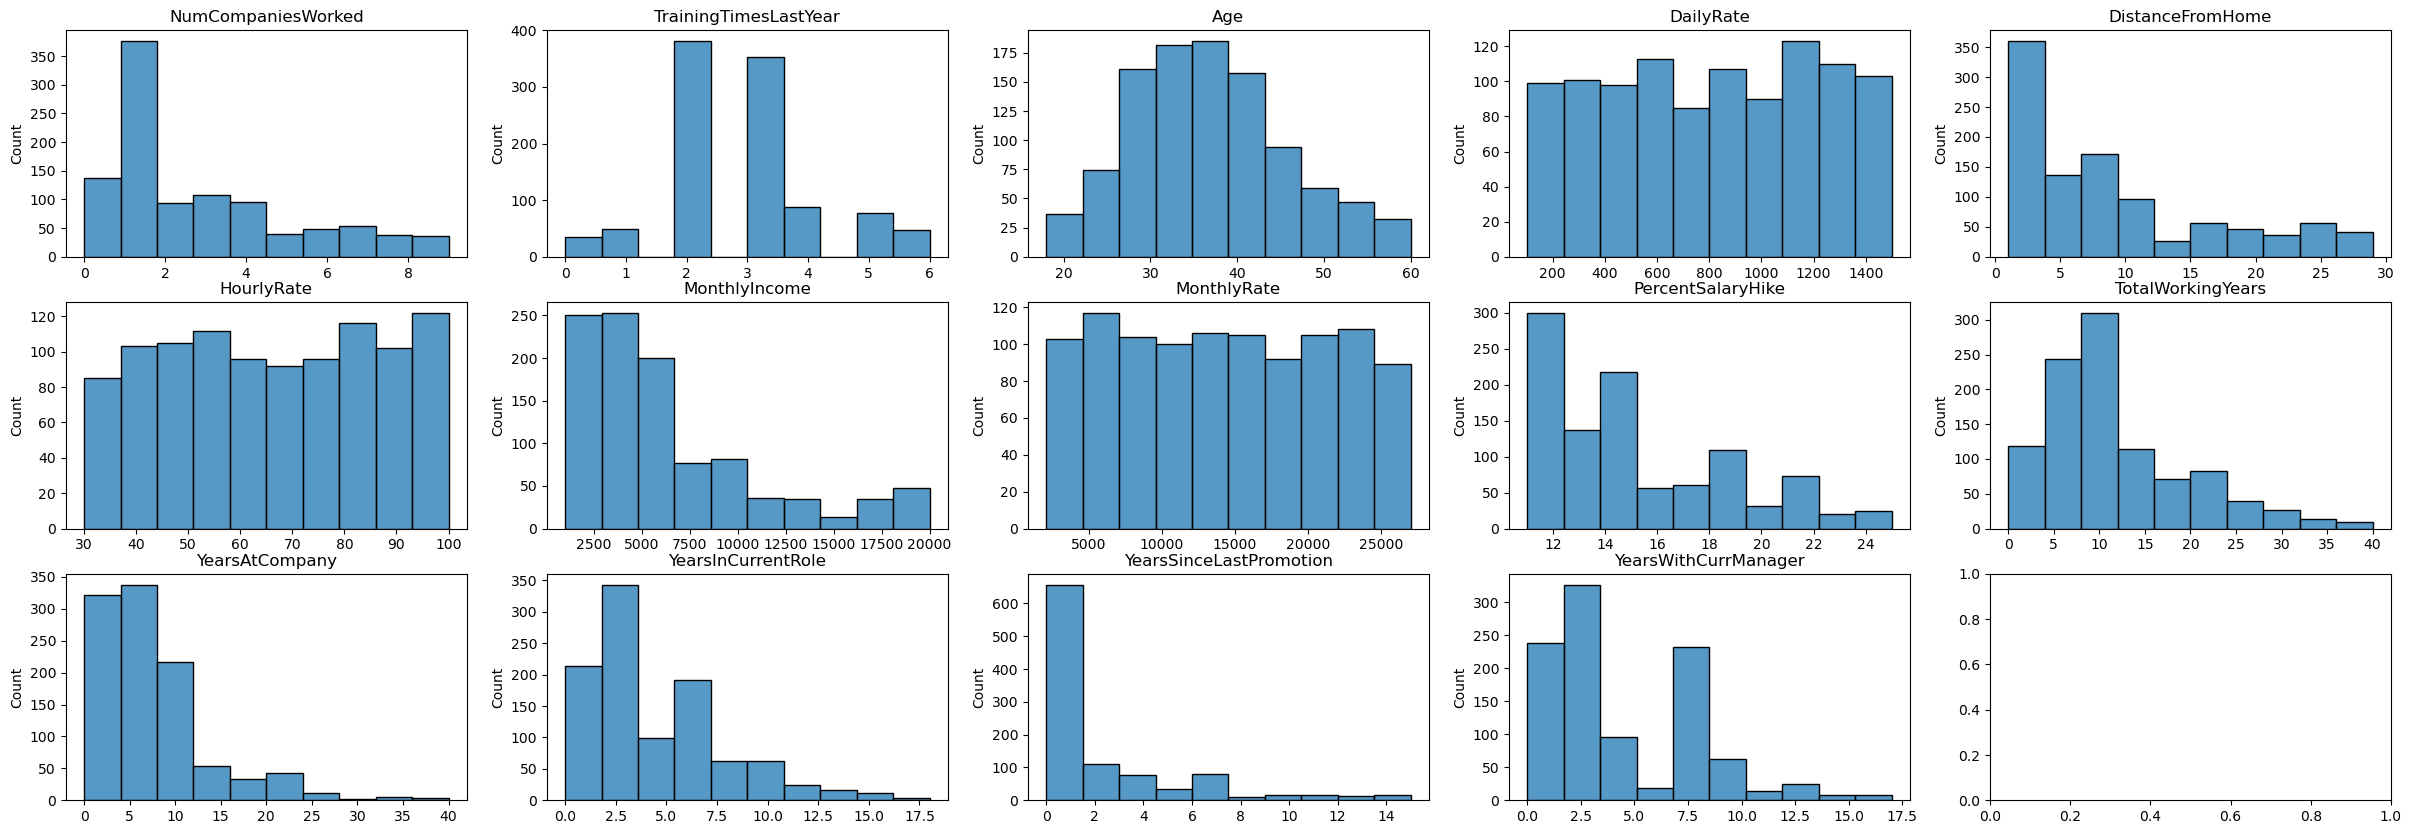

In [7]:
fig, axes = plt.subplots(3,5, figsize = (30,10))
axes = axes.ravel()
numCol = ['NumCompaniesWorked','TrainingTimesLastYear','Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for col,ax in zip(numCol,axes):
  sns.histplot(x=Xtrain[col],ax=ax, bins=10)
  ax.set(title=f'{col}',xlabel=None)

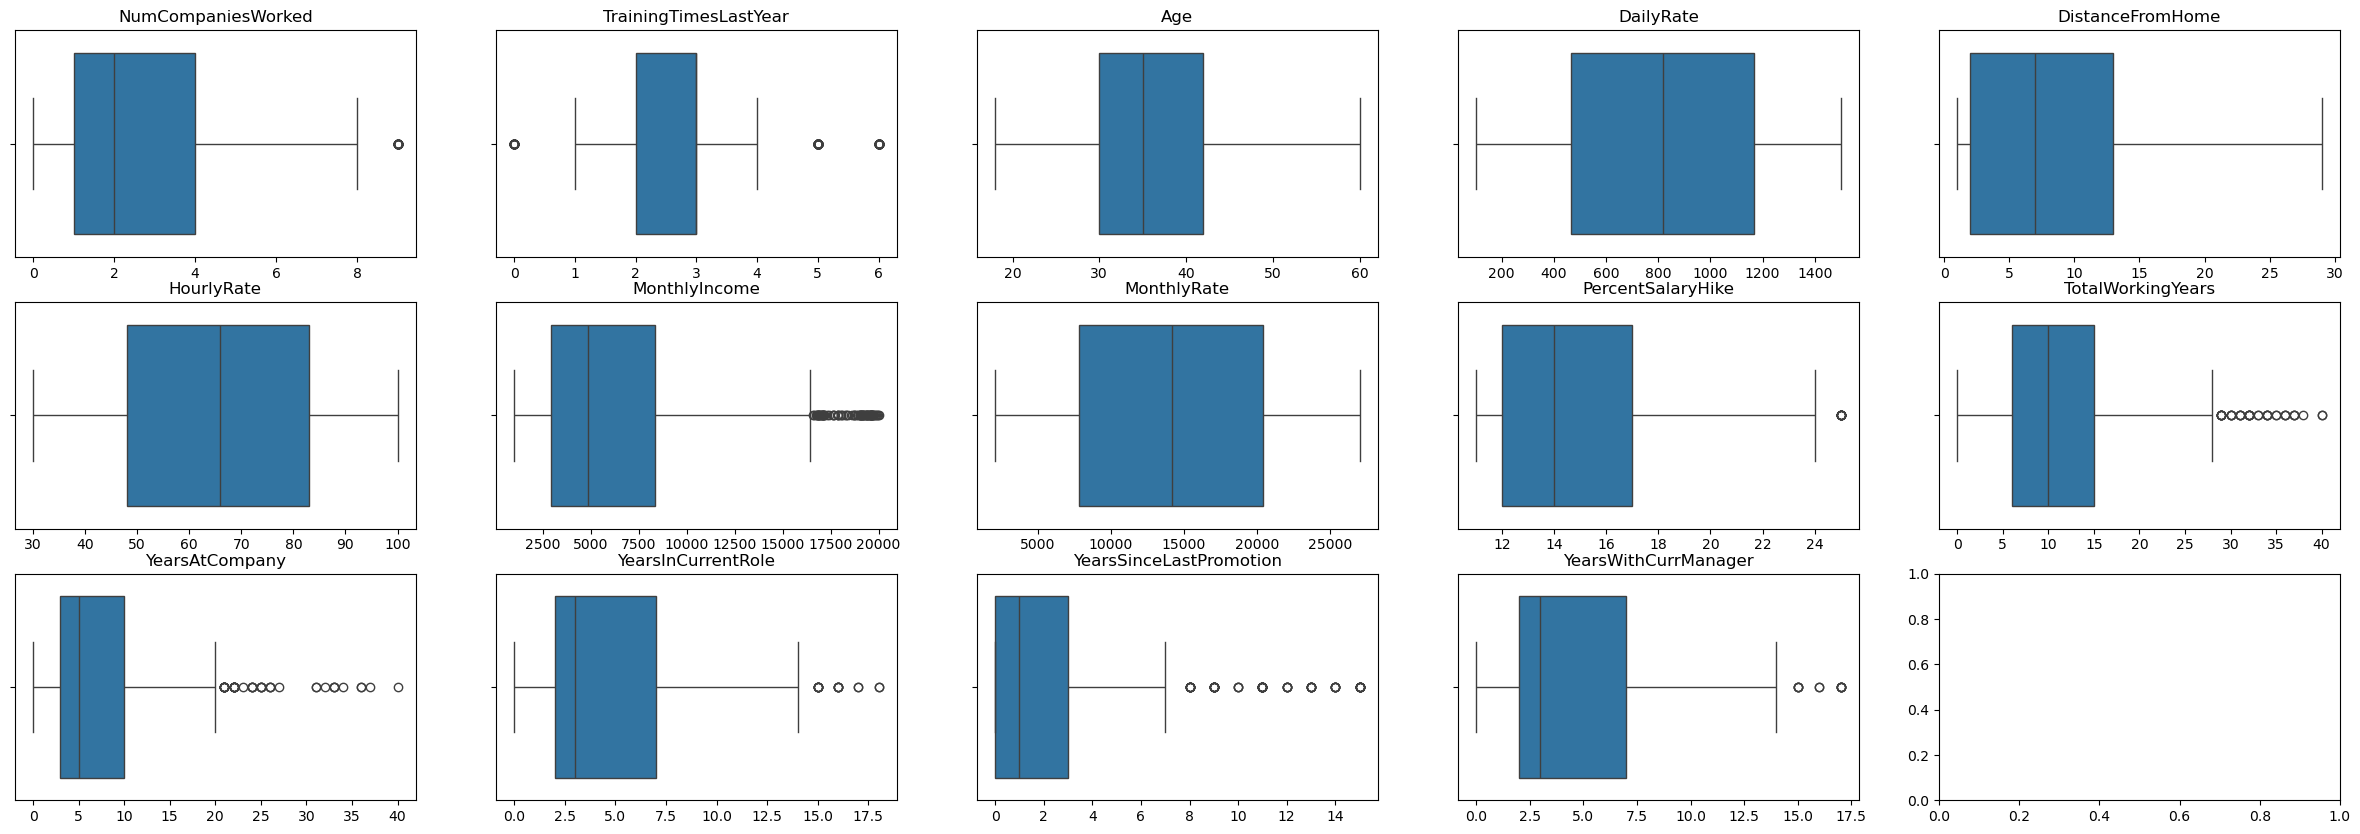

In [8]:
fig, axes = plt.subplots(3,5, figsize = (30,10))
axes = axes.ravel()
numCol = ['NumCompaniesWorked','TrainingTimesLastYear','Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for col,ax in zip(numCol,axes):
  sns.boxplot(x=Xtrain[col],ax=ax)
  ax.set(title=f'{col}',xlabel=None)

In [9]:
desc = Xtrain[numCol].describe().T
desc["Kurtosis"] = Xtrain[numCol].kurt()
desc["Skewness"] = Xtrain[numCol].skew()
desc

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness
NumCompaniesWorked,1029.0,2.702624,2.530553,0.0,1.0,2.0,4.0,9.0,-0.045266,1.024641
TrainingTimesLastYear,1029.0,2.804665,1.275227,0.0,2.0,3.0,3.0,6.0,0.585121,0.583878
Age,1029.0,36.773567,8.962538,18.0,30.0,35.0,42.0,60.0,-0.334518,0.442179
DailyRate,1029.0,810.112731,404.094553,103.0,468.0,819.0,1168.0,1499.0,-1.221482,-0.041341
DistanceFromHome,1029.0,8.966958,8.022274,1.0,2.0,7.0,13.0,29.0,-0.089093,1.014304
HourlyRate,1029.0,65.714286,20.371979,30.0,48.0,66.0,83.0,100.0,-1.211200,-0.010333
MonthlyIncome,1029.0,6477.754130,4686.054212,1009.0,2935.0,4876.0,8376.0,19999.0,1.111367,1.398851
MonthlyRate,1029.0,14276.242954,7158.451921,2094.0,7824.0,14168.0,20431.0,26999.0,-1.218076,0.037745
PercentSalaryHike,1029.0,15.100097,3.618033,11.0,12.0,14.0,17.0,25.0,-0.208512,0.853905
TotalWorkingYears,1029.0,11.222546,7.693676,0.0,6.0,10.0,15.0,40.0,0.967725,1.118038


Observing the results of my descriptive and graphical analysis, I can highlight the following points:

*   The following attributes have considerable positive skewness and will be transformed:
    * NumCompaniesWorked
    * TrainingTimesLastYear
    * DistanceFromHome
    * MonthlyIncome
    * PercentSalaryHike
    * TotalWorkingYears
    * YearsAtCompany
    * YearsInCurrentRole
    * YearsSinceLastPromotion
    * YearsWithCurrManager

*   The attributes have different scales, so they will need to be scaled to prevent some from taking priority over others. Since these have outliers, we will use a standard scaler after transforming the skewed data.

* To address both issues, we can use the Yeo-Johnson transformation from sklearn with the attribute "standardize=True" to perform both the transformation (to obtain normal distributions) and scaling in a single step.


We verify how the ordinal variables are displayed.

In [10]:

catOrd_pipeline_names = ['Education' ,'EnvironmentSatisfaction' ,'JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
print(pd.DataFrame({col: Xtrain[col].value_counts().to_dict() for col in catOrd_pipeline_names}))

   Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
3      399.0                    322.0           601.0     155.0   
4      288.0                    318.0            97.0      72.0   
2      198.0                    200.0           277.0     371.0   
1      107.0                    189.0            54.0     381.0   
5       37.0                      NaN             NaN      50.0   
0        NaN                      NaN             NaN       NaN   

   JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
3            300.0              881.0                     320.0   
4            315.0              148.0                     316.0   
2            203.0                NaN                     207.0   
1            211.0                NaN                     186.0   
5              NaN                NaN                       NaN   
0              NaN                NaN                       NaN   

   StockOptionLevel  WorkLifeBalance  
3              60.0  

In the case of categorical variables, we would need to perform encoding as follows:

* Ordinal (even though these variables are represented as numerical values, we will apply a transformation to ensure they all start at 0):
  * Education
  * EnvironmentSatisfaction
  * JobInvolvement
  * JobLevel
  * JobSatisfaction
  * PerformanceRating
  * RelationshipSatisfaction
  * StockOptionLevel
  * WorkLifeBalance
* OneHot:
  * BusinessTravel
  * Department
  * EducationField
  * JobRole
  * MaritalStatus

Now we examine the binary variables. Both are in text form, so we need to convert them to numerical format. For this, we can use one-hot encoding again.

In [11]:
df[['Gender','OverTime']]

,Gender,OverTime
0,Female,Yes
1,Male,No
2,Male,Yes
3,Female,Yes
4,Male,No
...,...,...
1465,Male,No
1466,Male,No
1467,Male,Yes
1468,Male,No


In [12]:
df[['Gender','OverTime']].nunique()

Gender      2
OverTime    2
dtype: int64

Finally, a simple imputer will be added to each pipeline to prevent potential null values in the test data.

In [13]:
# ++++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

# **Exercise 8:**

**Use the Pipeline and ColumnTransformer classes from Sklearn to define the transformations that should be applied to each variable according to its type.**



Justification:

* Numerical Variable Transformers:
  * Yeo-Johnson: The "Yeo-Johnson" transformer was chosen because our numerical variables have widely varying scales and contain zero values. This transformation helps normalize their distribution. Additionally, with the parameter "standardize=True", this transformation also performs standardization in the same step.

* Binary Variable Transformers:
  * OneHotEncoder: As we observed in the previous exercise, the binary variables in our dataset are represented as text, making it essential to encode them as numbers for our algorithms to function properly. "OneHotEncoder" was selected because, using the parameter "drop=first", the final output will be a single column with binary values of 0 and 1, exactly as needed.


In [14]:
# ++++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++

# NUMERICAL:
numericas_pipeline = Pipeline(steps = [('impnum',SimpleImputer()),
                                       ('yeojohn',PowerTransformer(method='yeo-johnson', standardize=True))] )
numericas_pipeline_nombres = ['NumCompaniesWorked','TrainingTimesLastYear','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Age','DailyRate','HourlyRate','MonthlyRate']

# ORDINAL:
catOrd_pipeline = Pipeline( steps = [('impOrd',SimpleImputer(strategy="most_frequent")),
                                     ('ordEnc',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))] )
catOrd_pipeline_names = ['Education' ,'EnvironmentSatisfaction' ,'JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

# BINARy:
catBin_pipeline = Pipeline( steps = [('impBin',SimpleImputer(strategy="most_frequent")),
                                     ('lblEnc',OneHotEncoder(handle_unknown='ignore', drop='first'))]  )
catBin_pipeline_nombres = ['Gender','OverTime']

# NOMINAL:
catNom_pipeline = Pipeline( steps = [('impNom',SimpleImputer(strategy="most_frequent")),
                                     ('OneHotE', OneHotEncoder(handle_unknown='ignore', drop='first'))])
catNom_pipeline_nombres = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']




columnsTransformer = ColumnTransformer( transformers = [('numPipe'     ,numericas_pipeline                 ,numericas_pipeline_nombres),
                                                         ('ordPipe'     ,catOrd_pipeline                    ,catOrd_pipeline_names),
                                                         ('binPipe'     ,catBin_pipeline                    ,catBin_pipeline_nombres ),
                                                         ('nomPipe'     ,catNom_pipeline                    ,catNom_pipeline_nombres )] )

# ++++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

# **Exercise 9:**

**Merge the training and validation sets into a single DataFrame.**

We name these new DataFrames Xtv and ytv.

In [15]:
# ++++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++

Xtv = pd.concat([Xtrain,Xval], axis=0, ignore_index=True)
ytv = pd.concat([ytrainT,yvalT], axis=0, ignore_index=True)

# ++++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249, 1)


# **Exercise 10:**

**We find the best hyperparameters**

>> LR 0.880 (0.013)
>> LASSO 0.882 (0.014)
>> RIDGE 0.879 (0.013)
>> EN 0.880 (0.013)
>> kNN 0.844 (0.010)


C:\Users\mario\AppData\Local\Temp\ipykernel_35908\737763420.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # Box plot to visualize the results.


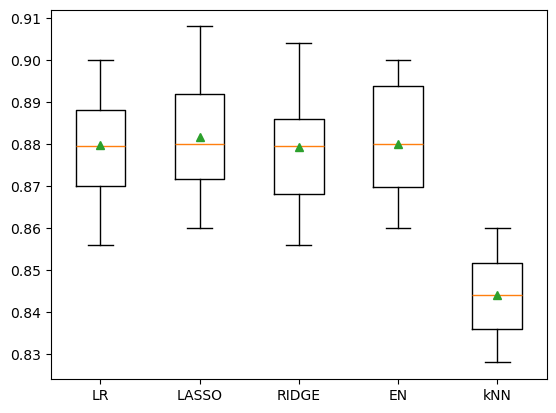

In [16]:
# ++++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Logistic Regression without Regularization:
  modelos.append(LogisticRegression(penalty=None,  # This "penalty" value should not be changed, as it defines the model without regularization.
                                    solver='lbfgs', max_iter=3000,     # Include all hyperparameters and values you consider appropriate here.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Logistic Regression with L1 Regularization:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=3000, C=1.,     # Include all hyperparameters and values you consider appropriate here.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Logistic Regression with L2 Regularization:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver= 'newton-cg', max_iter=3000, C=10.01,     # Include all hyperparameters and values you consider appropriate here.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - Logistic Regression with both L1 and L2 Regularization:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5,solver='saga',max_iter=3000, C=1.,    # Include all hyperparameters and values you consider appropriate here.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Nearest Neighbors:
  modelos.append(KNeighborsClassifier()) # Include all hyperparameters and values you consider appropriate here.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++



# We train the models:

modelos, nombres = mis_modelos()  # Accesing the models.
resultados = list()    # List where the results will be saved.

# Iterating and training every model:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnsTransformer),('m',modelos[i])])   # Using the pipeline to transform the model.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Using cross validation.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # Training and saving the results.

  resultados.append(scores)    # Saving the results in a list.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # Displaying each models score.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # Box plot to visualize the results.
plt.show()

# **Exercise 11:**

**Using the best model and the data Xtv and ytv, perform a grid search to find the optimal hyperparameters. Ensure that the model is neither underfitted nor overfitted.**

In [17]:
# +++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++


best_model = LogisticRegression(penalty='l1',max_iter=5000,random_state=1)

dicc_grid = {'C':[.001,.01,.1,1.,10.,100,1000,10000],'solver':['liblinear', 'saga'],'class_weight':['balanced',None]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

grid = GridSearchCV(estimator=best_model,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy',
                    n_jobs=-1,
                    return_train_score=True
                    )

columnsTransformer.fit(Xtrain)
Xx = columnsTransformer.transform(Xtv)
grid_result = grid.fit(Xx, np.ravel(ytv))
# +++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++



print("Best model: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('Averages Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Averages Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Best model: 0.882305 using {'C': 1.0, 'class_weight': None, 'solver': 'liblinear'}
Averages Train mean(std): 0.8180(0.0151)
Averages Val mean(std): 0.8013(0.0226)


# **Exercise 12:**

**With the best hyperparameter values from the optimal model, obtain:**

*   **a) Confusion Matrix.**
*   **b) Factor Importance Analysis.**
*   **c) Metrics Report.**

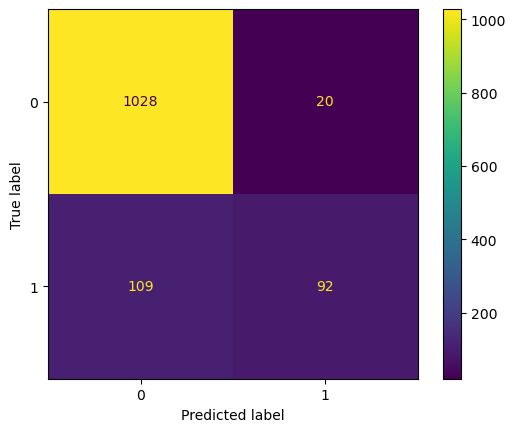

In [18]:
# +++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++
# Include all the cells you deem appropriate to address
# these three sections of the exercise.

bestModel = grid_result.best_estimator_

ConfusionMatrixDisplay.from_estimator(bestModel, Xx, np.ravel(ytv))
plt.show()


# +++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

To calculate accuracy:

In [19]:
cmY = bestModel.predict(Xx)
accuracy_score(ytv,cmY)

0.8967173738991193

Factor Importance Analysis

The code performs the following steps:
* Retrieves the coefficient values of the factors.
* Computes the absolute value of the coefficients to compare their influence regardless of the sign.
* Identifies the five most important values.

With this, we determine that the most significant factors in our problem are
- binPipe__OverTime_Yes
- nomPipe__BusinessTravel_Travel_Frequently
- nomPipe__Department_Research & Development
- nomPipe__MaritalStatus_Single
- ordPipe__JobInvolvement

In [20]:
coef = pd.DataFrame(data = bestModel.coef_.reshape(-1,1),
             index = columnsTransformer.get_feature_names_out(),columns=["Coefficient"])
coef["AbsCoef"] = np.abs(coef["Coefficient"])
coef.sort_values(by="AbsCoef", ascending=False).head()

,Coefficient,AbsCoef
binPipe__OverTime_Yes,1.828251,1.828251
nomPipe__BusinessTravel_Travel_Frequently,1.347514,1.347514
nomPipe__Department_Research & Development,-0.664111,0.664111
nomPipe__MaritalStatus_Single,0.617866,0.617866
ordPipe__JobInvolvement,-0.567242,0.567242


In [21]:
print(classification_report(bestModel.predict(Xx), np.ravel(ytv), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      0.90      0.94      1137
         Yes       0.46      0.82      0.59       112

    accuracy                           0.90      1249
   macro avg       0.72      0.86      0.76      1249
weighted avg       0.93      0.90      0.91      1249



# **Exercise 13**

**Obtain the final performance of the model (accuracy) using the test set (test).**

In [22]:
# +++++++++ THE SECTION TO ADD CODE STARTS ++++++++++++++++++++++++
XTestTransformed = columnsTransformer.transform(Xtest)
yTestPred = bestModel.predict(XTestTransformed)

print(classification_report(ytestT, yTestPred , target_names=["No", "Yes"]) )

# +++++++++ THE SECTION TO ADD CODE ENDS ++++++++++++++++++++++++

              precision    recall  f1-score   support

          No       0.91      0.98      0.95       185
         Yes       0.86      0.53      0.66        36

    accuracy                           0.91       221
   macro avg       0.89      0.76      0.80       221
weighted avg       0.91      0.91      0.90       221



# **Exercise 14**

**Include your final conclusions for the activity.**

Looking at the confusion matrices and metrics, we can observe that our model is particularly effective at classifying "No" results. This is due to the dataset being dominated by this class, with very few instances classified as "Yes."


Future models could benefit from a higher number of "Yes" cases to avoid imbalance and ensure the dataset is more representative of reality.
